# Convolutional Neuronal Network (CNN)

In [1]:
import numpy as np
import pandas as pd

from clases.DenseLayer import DenseLayer
from clases.ConvLayer import ConvLayer
from clases.FlattenLayer import FlattenLayer
from clases.ActivationFunction import ReLU, Softmax
from clases.LossFunction import cross_entropy_loss, cross_entropy_loss_grad
from clases.Trainer import Trainer
from clases.Optimizer import GDOptimizer, AdamOptimizer
from clases.NeuronalNetwork import NeuronalNetwork

from clases.Test import *

### 1. Load data and reshape into pictures

In [2]:
# URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

In [3]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

#Reshape
X_train = X_train.reshape(len(X_train), 1, 28, 28)
X_test = X_test.reshape(len(X_test), 1, 28, 28)
X_val = X_val.reshape(len(X_val), 1, 28, 28)


### Learning rate 0.001 batch size 32

In [4]:
layers = [
    ConvLayer((1,28,28),3,5),
    FlattenLayer((5,26,26), (1,5*26*26)),
    DenseLayer(5 * 26 * 26, 100, ReLU),
    DenseLayer(100, 10, Softmax)
]

In [6]:
nn = NeuronalNetwork(None, [])
nn.layers = layers
optimizer = GDOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 32)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=20, print_every=1)

| Epoch   1 | time: 25.52s | val loss 0.049 | val metric 0.912 |
| Epoch   2 | time: 23.88s | val loss 0.040 | val metric 0.933 |
| Epoch   3 | time: 24.40s | val loss 0.037 | val metric 0.939 |
| Epoch   4 | time: 23.31s | val loss 0.033 | val metric 0.949 |
| Epoch   5 | time: 23.20s | val loss 0.031 | val metric 0.952 |
| Epoch   6 | time: 23.17s | val loss 0.030 | val metric 0.952 |
| Epoch   7 | time: 22.90s | val loss 0.028 | val metric 0.955 |
| Epoch   8 | time: 23.89s | val loss 0.027 | val metric 0.955 |
| Epoch   9 | time: 23.79s | val loss 0.026 | val metric 0.959 |
| Epoch  10 | time: 26.83s | val loss 0.025 | val metric 0.960 |
| Epoch  11 | time: 33.74s | val loss 0.025 | val metric 0.961 |
| Epoch  12 | time: 25.51s | val loss 0.024 | val metric 0.962 |
| Epoch  13 | time: 23.81s | val loss 0.023 | val metric 0.961 |
| Epoch  14 | time: 23.45s | val loss 0.024 | val metric 0.962 |
| Epoch  15 | time: 22.71s | val loss 0.023 | val metric 0.961 |
| Epoch  16 | time: 26.00

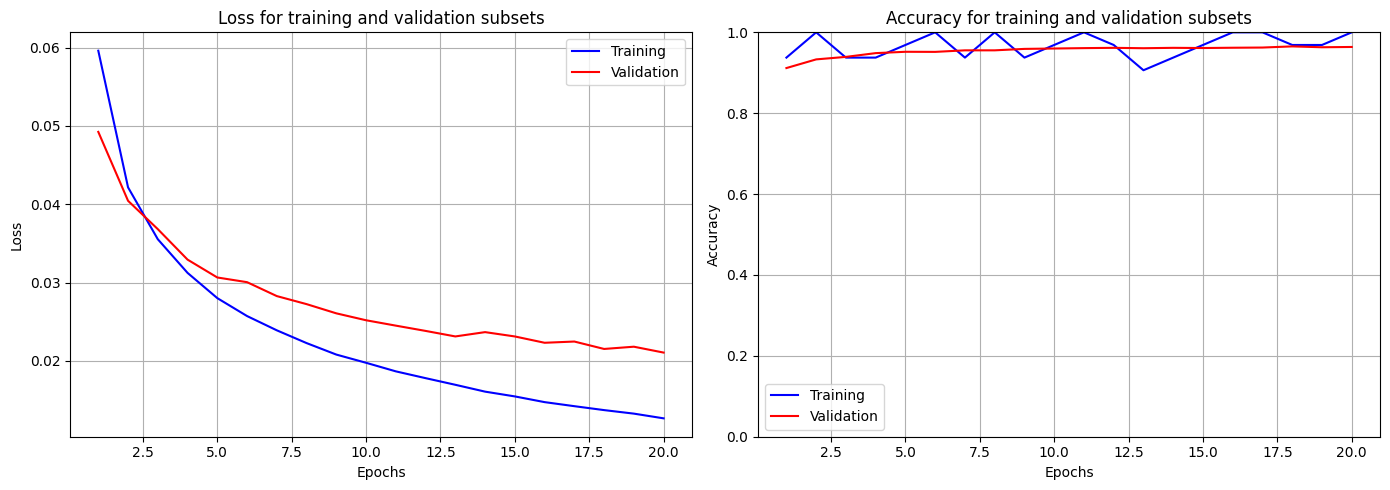

In [7]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

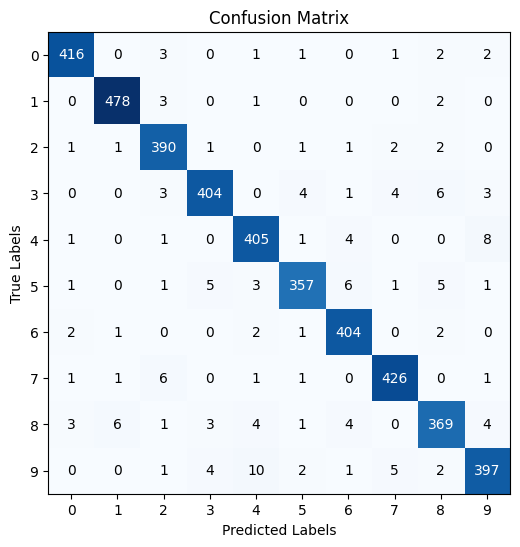

Accuracy: 0.9633333333333334
              precision    recall  f1_score  support
class                                               
0              0.978824  0.976526  0.977673      426
1              0.981520  0.987603  0.984552      484
2              0.953545  0.977444  0.965347      399
3              0.968825  0.950588  0.959620      425
4              0.948478  0.964286  0.956316      420
5              0.967480  0.939474  0.953271      380
6              0.959620  0.980583  0.969988      412
7              0.970387  0.974828  0.972603      437
8              0.946154  0.934177  0.940127      395
9              0.954327  0.940758  0.947494      422
weighted_avg   0.963365  0.963333  0.963280     4200


In [8]:
Y_pred = nn.forward(X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

###

In [5]:
layers = [
    ConvLayer((1,28,28),3,5),
    FlattenLayer((5,26,26), (1,5*26*26)),
    DenseLayer(5 * 26 * 26, 100, ReLU),
    DenseLayer(100, 10, Softmax)
]

In [6]:
nn = NeuronalNetwork(None, [])
nn.layers = layers
optimizer = GDOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 64)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=20, print_every=1)

| Epoch   1 | time: 24.67s | val loss 0.071 | val metric 0.880 |
| Epoch   2 | time: 22.68s | val loss 0.059 | val metric 0.895 |
| Epoch   3 | time: 40.65s | val loss 0.053 | val metric 0.909 |
| Epoch   4 | time: 53.84s | val loss 0.049 | val metric 0.910 |
| Epoch   5 | time: 56.04s | val loss 0.046 | val metric 0.915 |
| Epoch   6 | time: 55.99s | val loss 0.044 | val metric 0.922 |
| Epoch   7 | time: 25.34s | val loss 0.043 | val metric 0.923 |
| Epoch   8 | time: 26.62s | val loss 0.040 | val metric 0.926 |
| Epoch   9 | time: 24.75s | val loss 0.039 | val metric 0.928 |
| Epoch  10 | time: 23.68s | val loss 0.038 | val metric 0.931 |
| Epoch  11 | time: 23.65s | val loss 0.037 | val metric 0.934 |
| Epoch  12 | time: 24.16s | val loss 0.036 | val metric 0.933 |
| Epoch  13 | time: 25.44s | val loss 0.035 | val metric 0.937 |
| Epoch  14 | time: 23.59s | val loss 0.034 | val metric 0.939 |
| Epoch  15 | time: 25.69s | val loss 0.033 | val metric 0.941 |
| Epoch  16 | time: 24.65

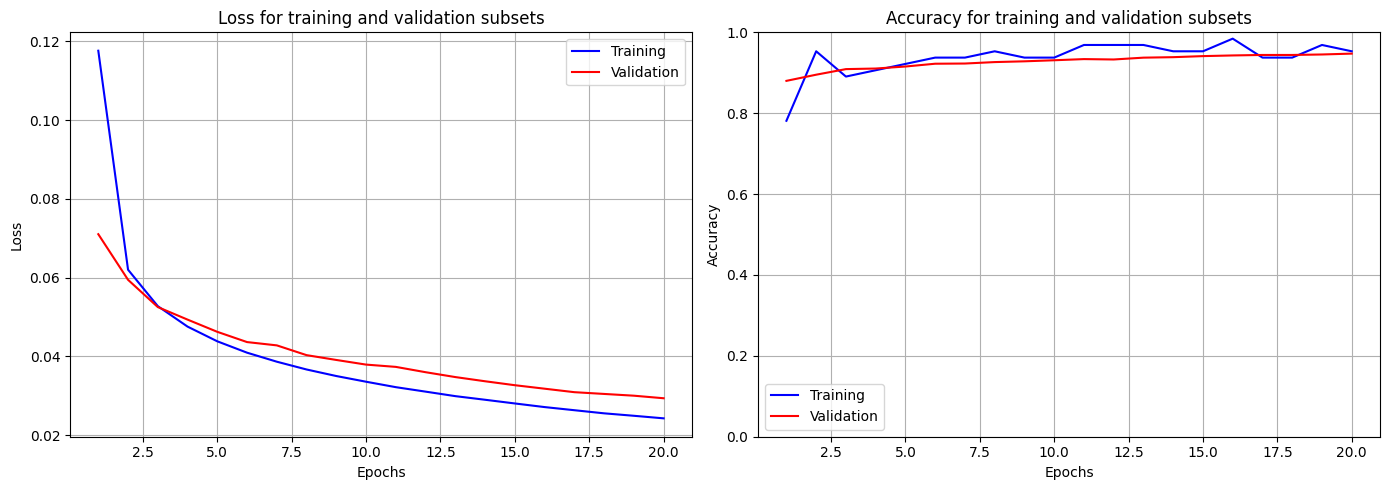

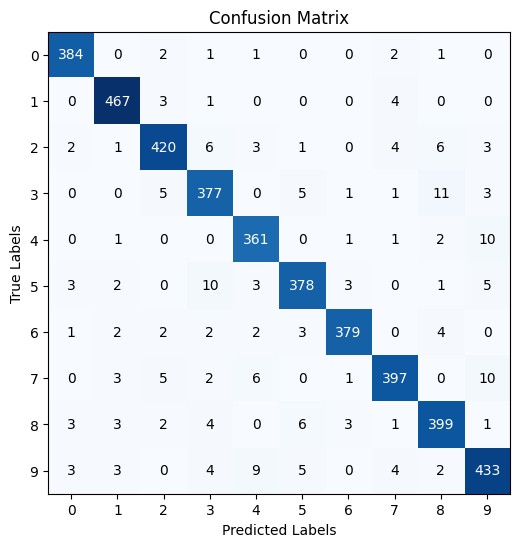

Accuracy: 0.9511904761904761
              precision    recall  f1_score  support
class                                               
0              0.969697  0.982097  0.975858      391
1              0.968880  0.983158  0.975967      475
2              0.956720  0.941704  0.949153      446
3              0.926290  0.935484  0.930864      403
4              0.937662  0.960106  0.948752      376
5              0.949749  0.933333  0.941469      405
6              0.976804  0.959494  0.968072      395
7              0.958937  0.936321  0.947494      424
8              0.936620  0.945498  0.941038      422
9              0.931183  0.935205  0.933190      463
weighted_avg   0.951283  0.951190  0.951176     4200


In [7]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = nn.forward(X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

In [10]:
layers = [
    ConvLayer((1,28,28),3,5),
    FlattenLayer((5,26,26), (1,5*26*26)),
    DenseLayer(5 * 26 * 26, 100, ReLU),
    DenseLayer(100, 10, Softmax)
]

nn = NeuronalNetwork(None, [])
nn.layers = layers
optimizer = GDOptimizer(learning_rate=0.005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 64)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=20, print_every=1)

| Epoch   1 | time: 32.41s | val loss 0.044 | val metric 0.922 |
| Epoch   2 | time: 48.08s | val loss 0.037 | val metric 0.935 |
| Epoch   3 | time: 47.49s | val loss 0.032 | val metric 0.940 |
| Epoch   4 | time: 51.68s | val loss 0.027 | val metric 0.956 |
| Epoch   5 | time: 49.06s | val loss 0.027 | val metric 0.951 |
| Epoch   6 | time: 46.75s | val loss 0.023 | val metric 0.961 |
| Epoch   7 | time: 43.22s | val loss 0.023 | val metric 0.960 |
| Epoch   8 | time: 48.03s | val loss 0.021 | val metric 0.964 |
| Epoch   9 | time: 48.83s | val loss 0.020 | val metric 0.966 |
| Epoch  10 | time: 46.62s | val loss 0.019 | val metric 0.966 |
| Epoch  11 | time: 50.23s | val loss 0.020 | val metric 0.965 |
| Epoch  12 | time: 47.35s | val loss 0.019 | val metric 0.970 |
| Epoch  13 | time: 50.76s | val loss 0.019 | val metric 0.968 |
| Epoch  14 | time: 54.45s | val loss 0.018 | val metric 0.969 |
| Epoch  15 | time: 51.85s | val loss 0.018 | val metric 0.969 |
| Epoch  16 | time: 48.50

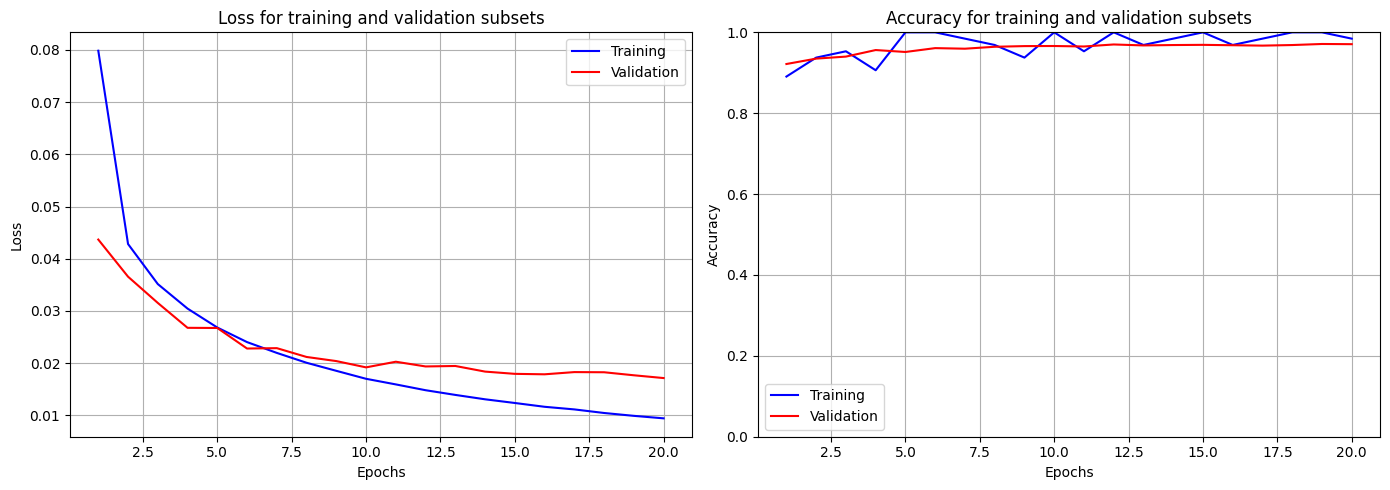

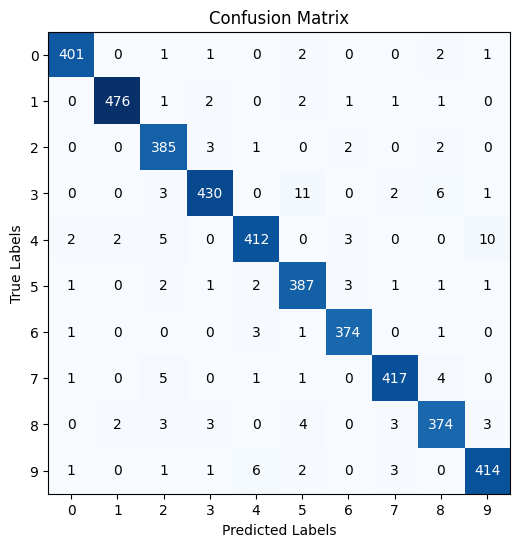

Accuracy: 0.969047619047619
              precision    recall  f1_score  support
class                                               
0              0.985258  0.982843  0.984049      408
1              0.991667  0.983471  0.987552      484
2              0.948276  0.979644  0.963705      393
3              0.975057  0.949227  0.961969      453
4              0.969412  0.949309  0.959255      434
5              0.943902  0.969925  0.956737      399
6              0.976501  0.984211  0.980341      380
7              0.976581  0.972028  0.974299      429
8              0.956522  0.954082  0.955300      392
9              0.962791  0.967290  0.965035      428
weighted_avg   0.969219  0.969048  0.969059     4200


In [11]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = nn.forward(X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)